# Complex networks: theory and applications
## Assignment 4: Barabasi-Albert graph - notebook to process the generated data

#### Andrea Senacheribbe

---

In [ ]:
figpath="figures/"

In [2]:
import numpy as np
import scipy.sparse as sparse, scipy.sparse.csgraph as sgraph, scipy.sparse.linalg as slinalg
import matplotlib.pyplot as plt, matplotlib.cm as cm
import numba as nb
import pandas as pd

In [3]:
df=pd.read_pickle("./results.pkl")

In [4]:
df

,n,fun,diameter,clustering,degree,deg_max
0,100000,1,7.54,0.000886,"[0.0, 0.0, 0.0, 40003.85, 19998.13, 11421.5, 7...",1540
1,100000,0.5,8.52,0.000120,"[0.0, 0.0, 0.0, 31067.36, 19342.25, 12825.73, ...",110
2,100000,1.5,3.50,0.845655,"[0.0, 0.0, 0.0, 94385.29, 4618.67, 615.04, 170...",97321


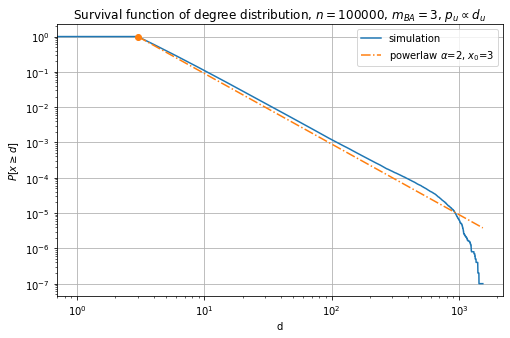

In [5]:
plt.figure(figsize=(8,5))

degree=df[df.fun==1].iloc[0].degree

surv=np.cumsum(degree[::-1], dtype=np.float64)[::-1]

surv/=df[df.fun==1].iloc[0].n

plt.loglog(surv)

x0=np.argmax(degree>0)
x = np.arange(x0, degree.size, dtype=np.float64)
a=2
pl=(x0**a)/np.power(x,a)
plt.loglog(x, pl, '-.')

plt.plot(x0,1, 'oC1')
plt.grid(True)
plt.xlabel("d")
plt.ylabel("$P[x \\geq d]$")
plt.legend(["simulation", "powerlaw $\\alpha$="+str(a)+", $x_0$="+str(x0)]);
plt.title("Survival function of degree distribution, $n=100000$, $m_{BA}=3$, $p_u \\propto d_u$")
plt.savefig(figpath+"deg_gamma1.pdf")

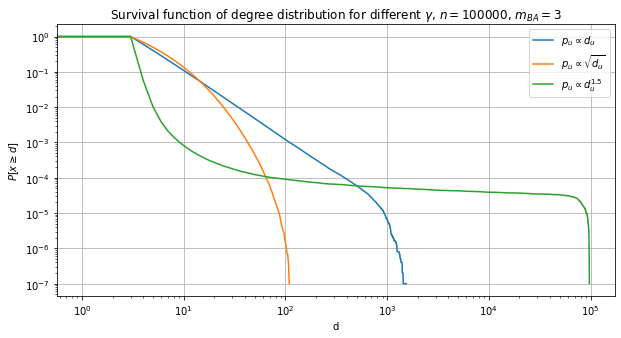

In [6]:
fun=df.fun.unique()

plt.figure(figsize=(10,5))
for f in fun:
    degree=df[df.fun==f].iloc[0].degree
    
    surv=np.cumsum(degree[::-1], dtype=np.float64)[::-1]
    surv/=df[df.fun==f].iloc[0].n
    
    plt.loglog(surv)

plt.grid(True)
plt.xlabel("d")
plt.ylabel("$P[x \\geq d]$")
plt.legend([ "$p_u \\propto d_u$" if i==1 else "$p_u \\propto \sqrt{d_u}$" if i==0.5 else "$p_u \\propto d_u^{"+str(i)+"}$" for i in fun]);
plt.title("Survival function of degree distribution for different $\gamma$, $n=100000$, $m_{BA}=3$")
plt.savefig(figpath+"deg_gammacomp.pdf")